# Анализ датасета https://www.kaggle.com/ukveteran/mortality-and-water-hardness

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"]= 11, 11
sns.set_theme(style="darkgrid")


def set_plot_size(ax, size=20) -> None:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	    label.set_fontsize(size)

def plot(frame: pd.DataFrame, title: str, size=20) -> None:
    ax = sns.scatterplot(data=frame[["mortality", "hardness"]], x="hardness", y="mortality")
    ax.set_title(title, fontsize=size)
    ax.set_ylabel("Смертность", fontsize=size)
    ax.set_xlabel("Жесткость воды", fontsize=size)
    
    set_plot_size(ax, size)

# т.к. данных очень мало на обучение придётся взять побольше
def plot_linear_regression(frame: pd.DataFrame, title: str, test_size=0.2, size=20) -> pd.Series:
    x_train, x_test, y_train, y_test = train_test_split(frame[["hardness"]], frame["mortality"], test_size=test_size, random_state=121)

    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    ax = plt.figure().add_subplot(111)
    ax.set_title(f"{title} с коэффициентом детерминации = {score}", fontsize=size)
    ax.set_ylabel("Смертность", fontsize=size)
    ax.set_xlabel("Жесткость воды", fontsize=size)

    set_plot_size(ax, size)

    ax.scatter(x_test, y_test)
    ax.plot(x_test, model.predict(x_test), c='r')
    ax.legend(["Тестовые данные", "регрессия"], fontsize=size)

    return y_test - model.predict(x_test)

def plot_residual(remainders: pd.Series, title: str, size=20):
    ax = sns.histplot(data=remainders)
    ax.set_title(title, fontsize=size)
    ax.set_xlabel("Смертность", fontsize=size)
    set_plot_size(ax)

In [3]:
frame = pd.read_csv("./water.csv", encoding="utf-8")
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


## Анализ данных по всем городам

### По графику ниже можно предположить, что чем ниже жесткость воды тем больше смертность (конечно это может быть связанно с недостатком кальция, но ведь избыток кальция тоже должен вызывать проблемы ). Похоже на линейную зависимость.

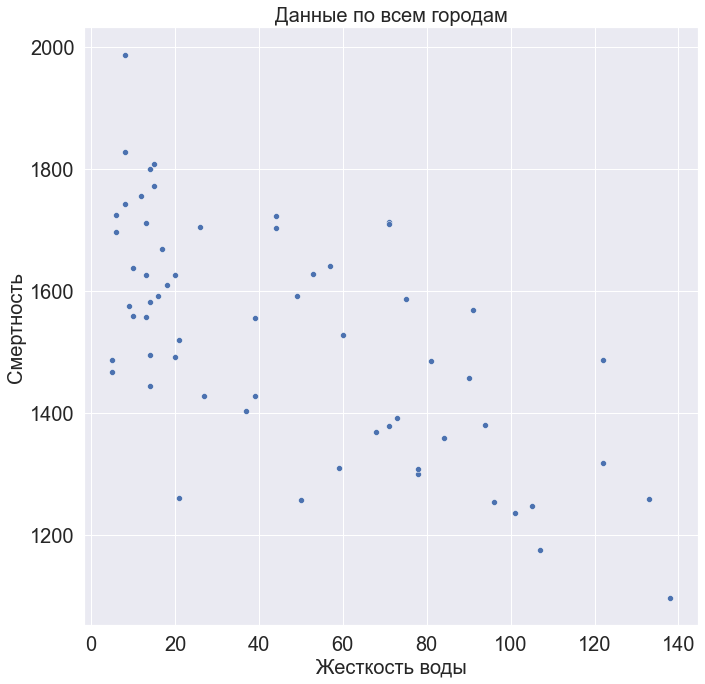

In [4]:
plot(frame, "Данные по всем городам")

### По коэффициенту Пирсона наблюдается линейная зависимость 

In [5]:
frame[["mortality", "hardness"]].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


### Коэффициент Спирмана показывает схожий результат

In [6]:
frame[["mortality", "hardness"]].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


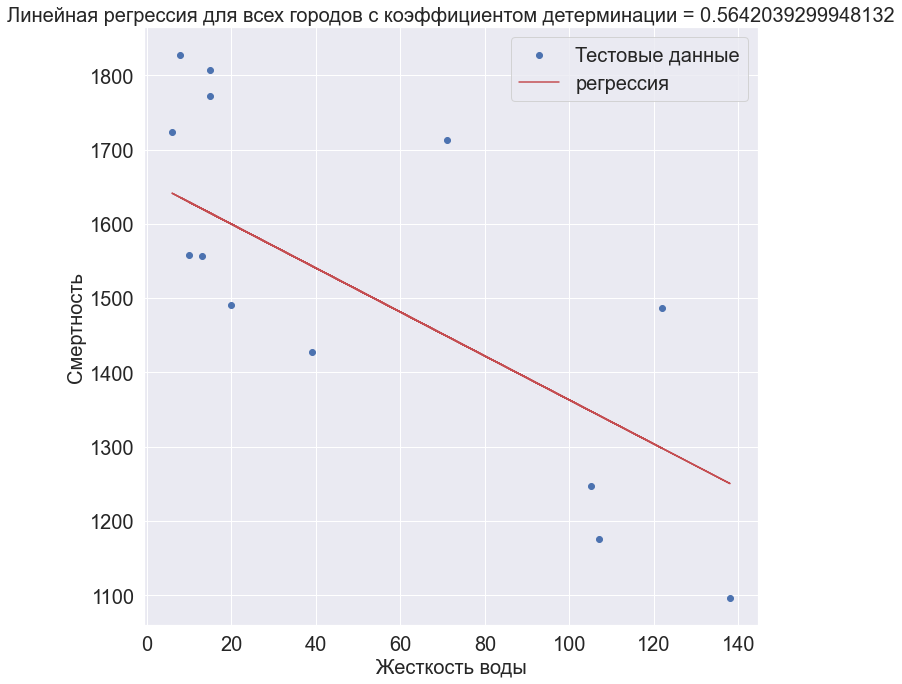

In [62]:
residual = plot_linear_regression(frame, "Линейная регрессия для всех городов")

### Конечно на графике ниже нельзя сказать, что распределение остаков похоже на нормальное. Возможно это из-за недостаточного размера данных.

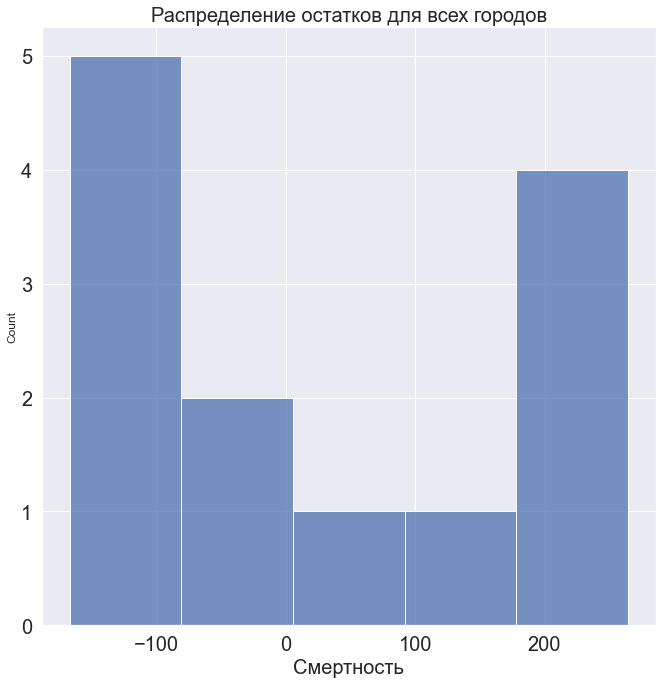

In [68]:
plot_residual(residual, "Распределение остатков для всех городов")

### Между данными заметна существенная корелляция. Жесткость воды может влиять на состояние здоровья, но данных недостаточно, чтобы одназначно судить. 

## Проверка тенденции при разбивке городов по регионам

## Южный регион

In [77]:
south_frame = frame.loc[frame["location"] == "South"]
south_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


### По южной части наблюдается такая же зависимость как и по всем регионам

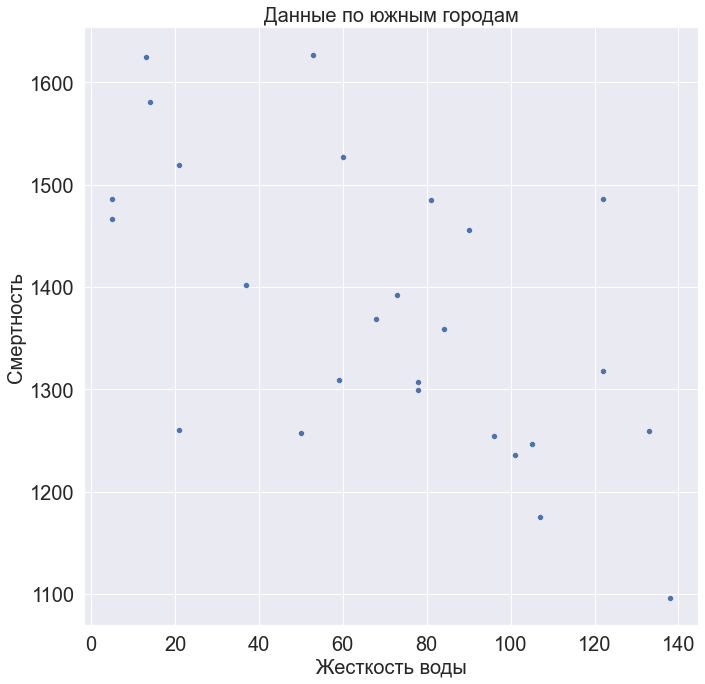

In [73]:
plot(south_frame, "Данные по южным городам")

### По коэффициенту Пирсона и Спирмана наблюдается линейная зависимость. Коэффициент корреляции близок к коэффициенту по всем регионам 

In [74]:
south_frame[["mortality", "hardness"]].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [75]:
south_frame[["mortality", "hardness"]].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


### Коэффициент детерминации значительно хуже, чем для всех регионов, но тут данных осталось в разы меньше.

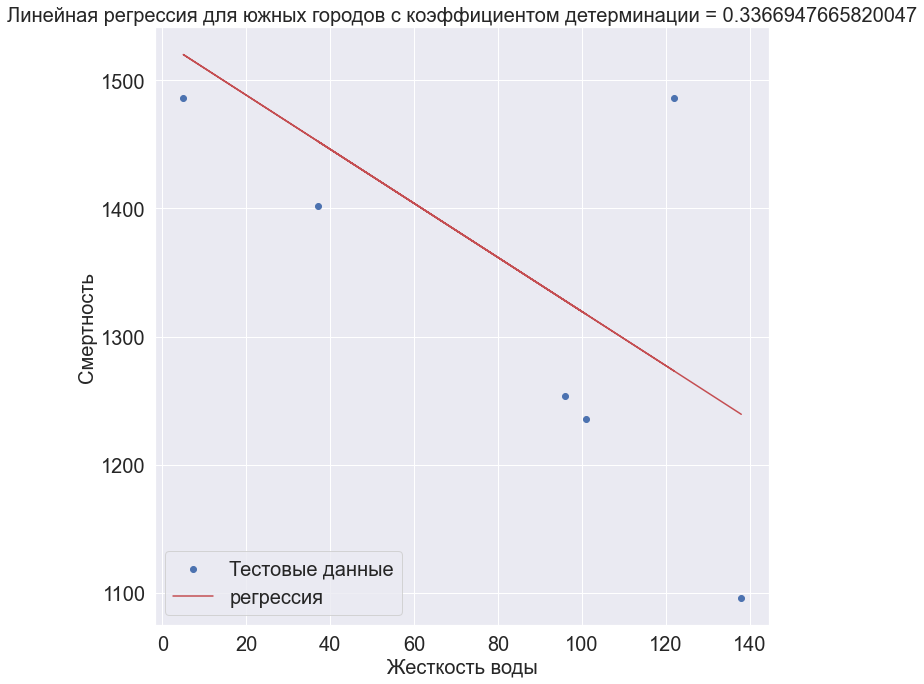

In [79]:
south_residual = plot_linear_regression(south_frame, "Линейная регрессия для южных городов")

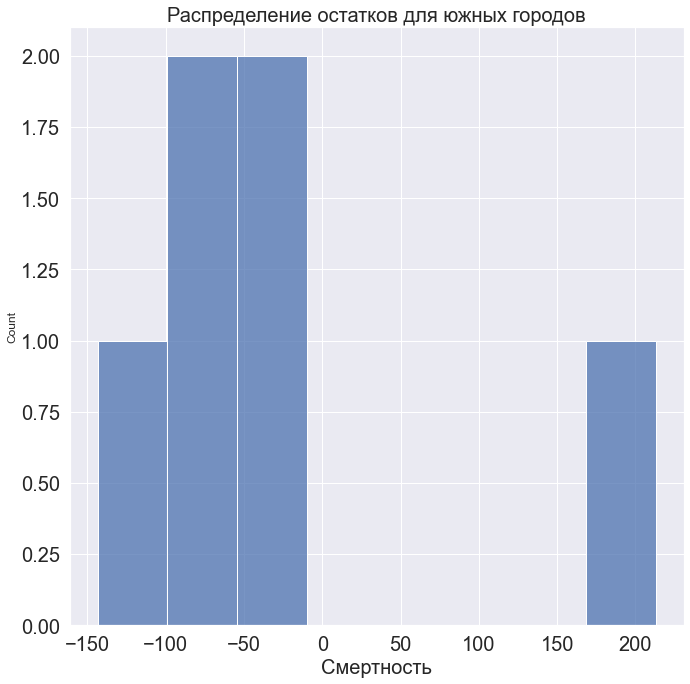

In [81]:
plot_residual(south_residual, "Распределение остатков для южных городов")

## Северный регион

In [82]:
north_frame = frame.loc[frame["location"] == "North"]
north_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


### Коэффициенты для северного региона сильно отличаются от южного

In [83]:
north_frame[["mortality", "hardness"]].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [85]:
north_frame[["mortality", "hardness"]].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


## Для северного региона зависимость явно не линейная (либо ее нет)

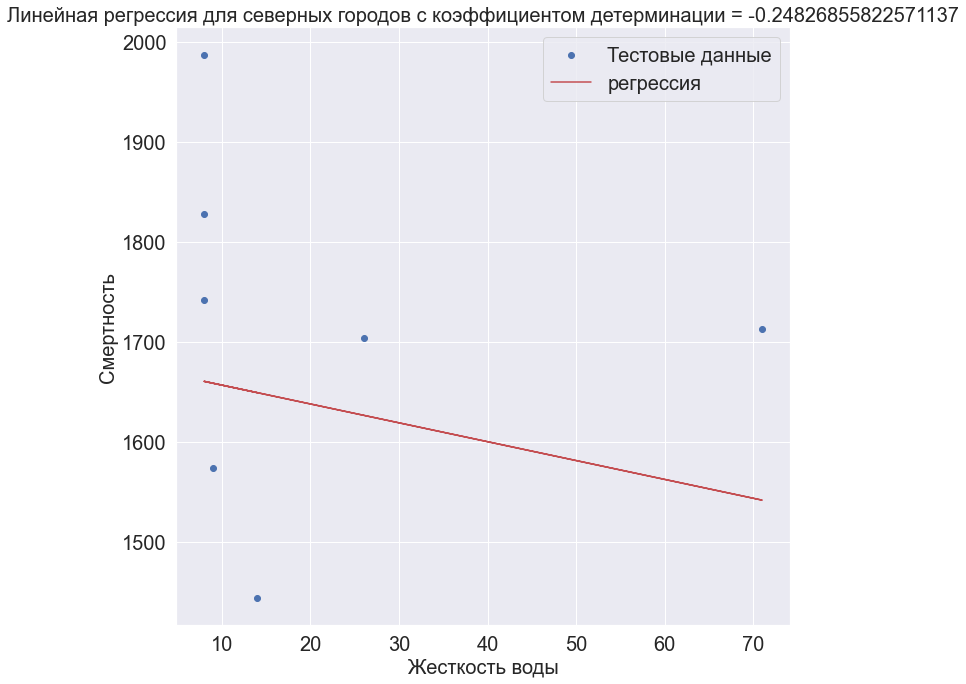

In [90]:
north_residual = plot_linear_regression(north_frame, "Линейная регрессия для северных городов")

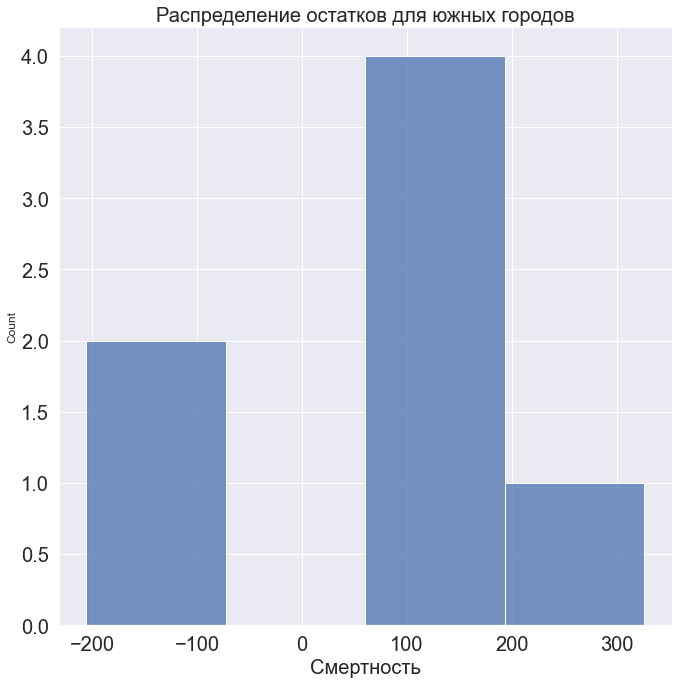

In [91]:
plot_residual(north_residual, "Распределение остатков для южных городов")

# Данных слишком мало. При этом зависимость для 2-х регионов сильно отличаются. Скорее всего связи нет. Дело в недостаточном кол-ве данных из-за, которых получается линейная зависимость от вклада южного региона. Да и странно это, чтобы жесткость воды так влияла на смертность.